# 1. Calculating volatility (stdv)

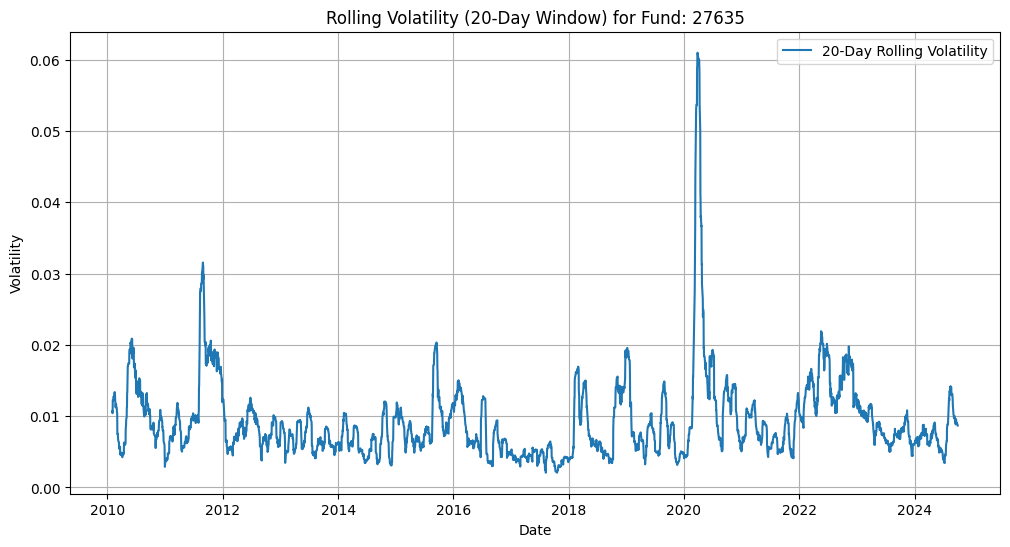

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

file1_path = 'AllFunds.xlsx'  
daily_data = pd.read_excel(file1_path)

daily_data['Daily Return per share'] = pd.to_numeric(daily_data['Daily Return per share'], errors='coerce')
daily_data['Date'] = pd.to_datetime(daily_data['Date'], errors='coerce')
daily_data['Fund Identifier'] = daily_data['Fund Identifier'].astype(str)

fund_identifier = '27635'  
filtered_data = daily_data[daily_data['Fund Identifier'] == fund_identifier].copy()  

if filtered_data.empty:
    print(f"No data found for Fund Identifier: {fund_identifier}")
else:
    window_size = 20  
    filtered_data['Rolling Volatility'] = filtered_data['Daily Return per share'].rolling(window=window_size).std()
    filtered_data = filtered_data.dropna(subset=['Rolling Volatility'])

    plt.figure(figsize=(12, 6))
    plt.plot(filtered_data['Date'], filtered_data['Rolling Volatility'], label=f'{window_size}-Day Rolling Volatility')
    plt.title(f'Rolling Volatility ({window_size}-Day Window) for Fund: {fund_identifier}')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.legend()
    plt.grid()
    plt.show()

# 2. Calculating Absolute & Relative Drawdowns

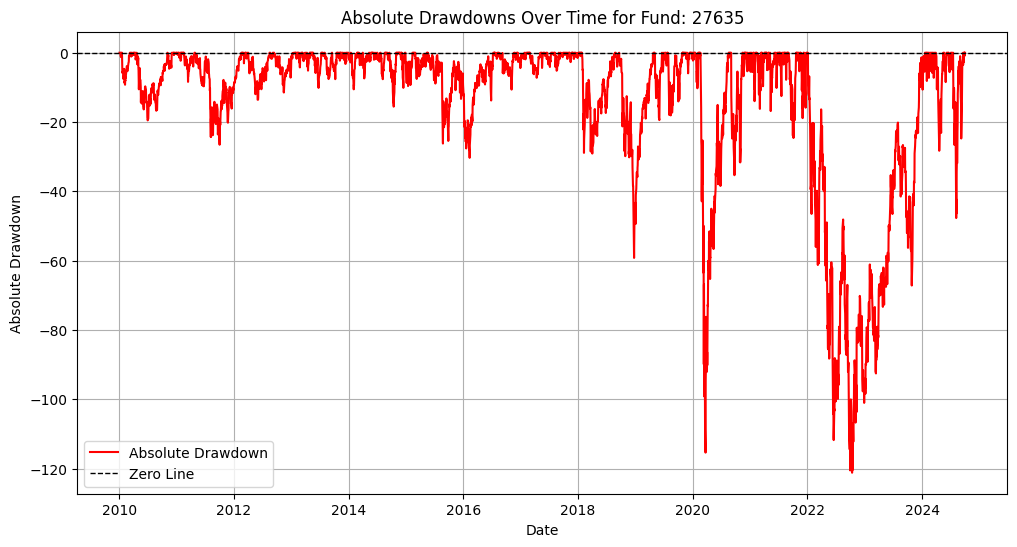

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

file1_path = 'AllFunds.xlsx'  
daily_data = pd.read_excel(file1_path)

daily_data['Net Asset Value per Share'] = pd.to_numeric(daily_data['Net Asset Value per Share'], errors='coerce')
daily_data['Date'] = pd.to_datetime(daily_data['Date'], errors='coerce')
daily_data['Fund Identifier'] = daily_data['Fund Identifier'].astype(str)

fund_identifier = '27635'  
filtered_data = daily_data[daily_data['Fund Identifier'] == fund_identifier].copy()  

if filtered_data.empty:
    print(f"No data found for Fund Identifier: {fund_identifier}")
else:
    filtered_data['Running Max NAV'] = filtered_data['Net Asset Value per Share'].cummax()

    filtered_data['Absolute Drawdown'] = filtered_data['Net Asset Value per Share'] - filtered_data['Running Max NAV']

    plt.figure(figsize=(12, 6))
    plt.plot(filtered_data['Date'], filtered_data['Absolute Drawdown'], label='Absolute Drawdown', color='red')
    plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Zero Line')
    plt.title(f'Absolute Drawdowns Over Time for Fund: {fund_identifier}')
    plt.xlabel('Date')
    plt.ylabel('Absolute Drawdown')
    plt.legend()
    plt.grid()
    plt.show()

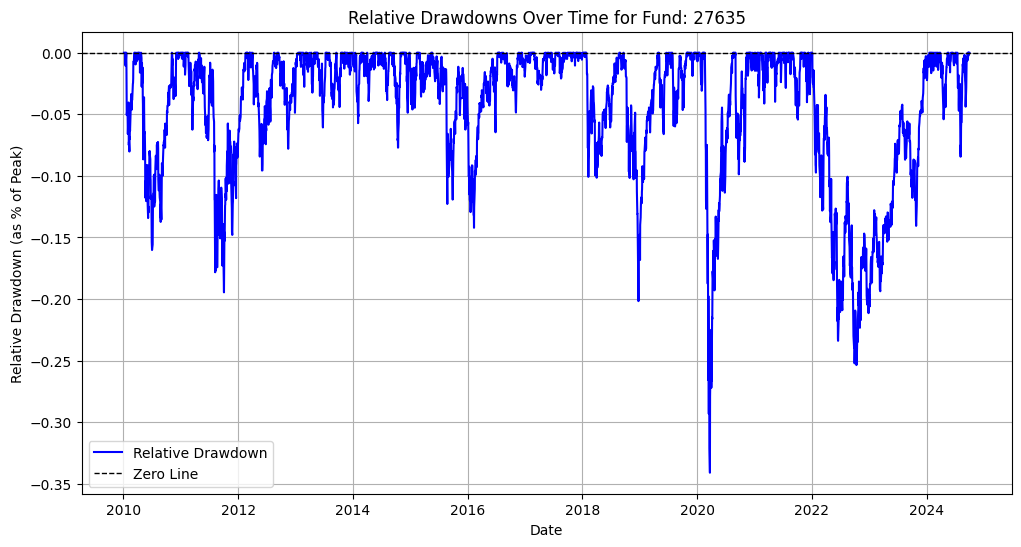

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

file1_path = 'AllFunds.xlsx'  
daily_data = pd.read_excel(file1_path)

daily_data['Net Asset Value per Share'] = pd.to_numeric(daily_data['Net Asset Value per Share'], errors='coerce')
daily_data['Date'] = pd.to_datetime(daily_data['Date'], errors='coerce')

daily_data['Fund Identifier'] = daily_data['Fund Identifier'].astype(str)

fund_identifier = '27635'  
filtered_data = daily_data[daily_data['Fund Identifier'] == fund_identifier].copy()  

if filtered_data.empty:
    print(f"No data found for Fund Identifier: {fund_identifier}")
else:
    filtered_data['Running Max NAV'] = filtered_data['Net Asset Value per Share'].cummax()
    filtered_data['Relative Drawdown'] = (filtered_data['Net Asset Value per Share'] / filtered_data['Running Max NAV']) - 1

    plt.figure(figsize=(12, 6))
    plt.plot(filtered_data['Date'], filtered_data['Relative Drawdown'], label='Relative Drawdown', color='blue')
    plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Zero Line')
    plt.title(f'Relative Drawdowns Over Time for Fund: {fund_identifier}')
    plt.xlabel('Date')
    plt.ylabel('Relative Drawdown (as % of Peak)')
    plt.legend()
    plt.grid()
    plt.show()

# 2.1 Frequency, Duration, and Magnitude of Drawdowns 

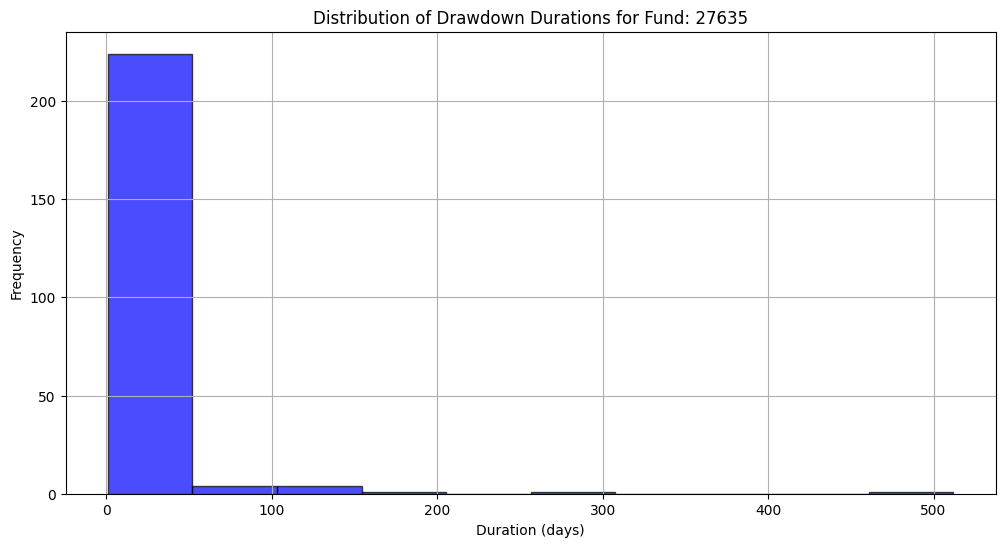

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

file1_path = 'AllFunds.xlsx'  
daily_data = pd.read_excel(file1_path)

daily_data['Net Asset Value per Share'] = pd.to_numeric(daily_data['Net Asset Value per Share'], errors='coerce')
daily_data['Date'] = pd.to_datetime(daily_data['Date'], errors='coerce')
daily_data['Fund Identifier'] = daily_data['Fund Identifier'].astype(str)

fund_identifier = '27635'  
filtered_data = daily_data[daily_data['Fund Identifier'] == fund_identifier].copy()  

if filtered_data.empty:
    print(f"No data found for Fund Identifier: {fund_identifier}")
else:
    filtered_data['Running Max NAV'] = filtered_data['Net Asset Value per Share'].cummax()
    filtered_data['Drawdown'] = (filtered_data['Net Asset Value per Share'] / filtered_data['Running Max NAV']) - 1
    filtered_data['In Drawdown'] = filtered_data['Drawdown'] < 0

    drawdown_periods = []
    drawdown_start_index = None

    for i, in_drawdown in enumerate(filtered_data['In Drawdown']):
        if in_drawdown:
            if drawdown_start_index is None:
                drawdown_start_index = i
        else:
            if drawdown_start_index is not None:
                drawdown_periods.append((drawdown_start_index, i - 1))
                drawdown_start_index = None

    if drawdown_start_index is not None:
        drawdown_periods.append((drawdown_start_index, len(filtered_data) - 1))

    drawdown_metrics = []
    for start, end in drawdown_periods:
        duration = end - start + 1
        magnitude = filtered_data['Drawdown'][start:end + 1].min()  
        drawdown_metrics.append({'Start': start, 'End': end, 'Duration': duration, 'Magnitude': magnitude})

    drawdown_metrics_df = pd.DataFrame(drawdown_metrics)

    plt.figure(figsize=(12, 6))
    plt.hist(drawdown_metrics_df['Duration'], bins=10, color='blue', alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of Drawdown Durations for Fund: {fund_identifier}')
    plt.xlabel('Duration (days)')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

    drawdown_metrics_df.head()


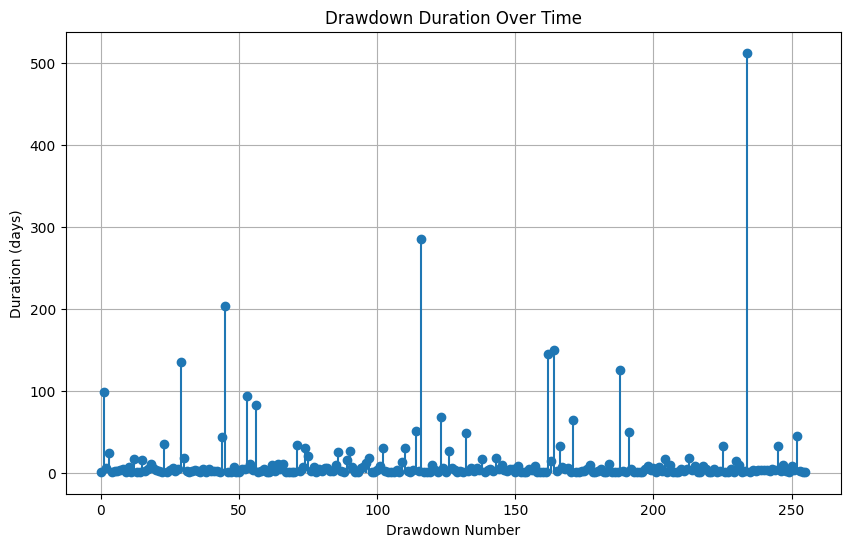

In [8]:
plt.figure(figsize=(10, 6))
plt.stem(range(len(drawdown_metrics_df)), drawdown_metrics_df['Duration'], basefmt=" ")
plt.title('Drawdown Duration Over Time')
plt.xlabel('Drawdown Number')
plt.ylabel('Duration (days)')
plt.grid()
plt.show()

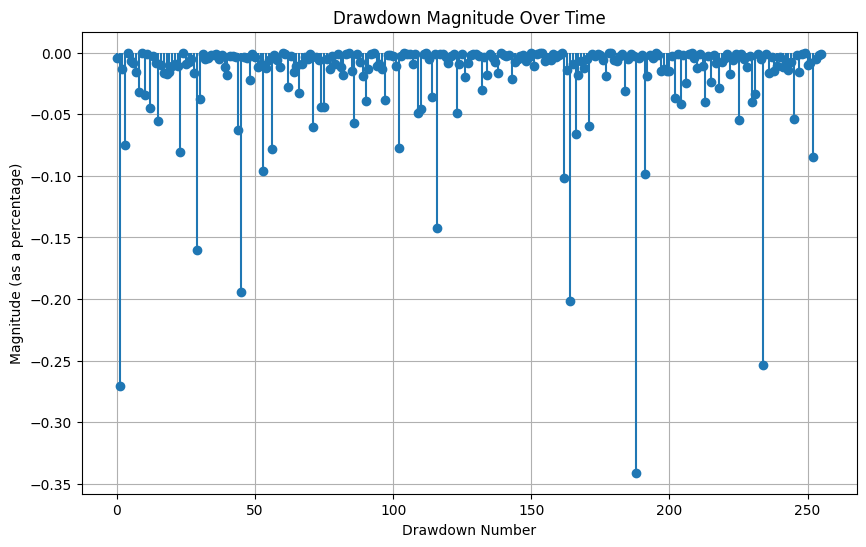

In [10]:
plt.figure(figsize=(10, 6))
plt.stem(range(len(drawdown_metrics_df)), drawdown_metrics_df['Magnitude'], basefmt=" ")
plt.title('Drawdown Magnitude Over Time')
plt.xlabel('Drawdown Number')
plt.ylabel('Magnitude (as a percentage)')
plt.grid()
plt.show()

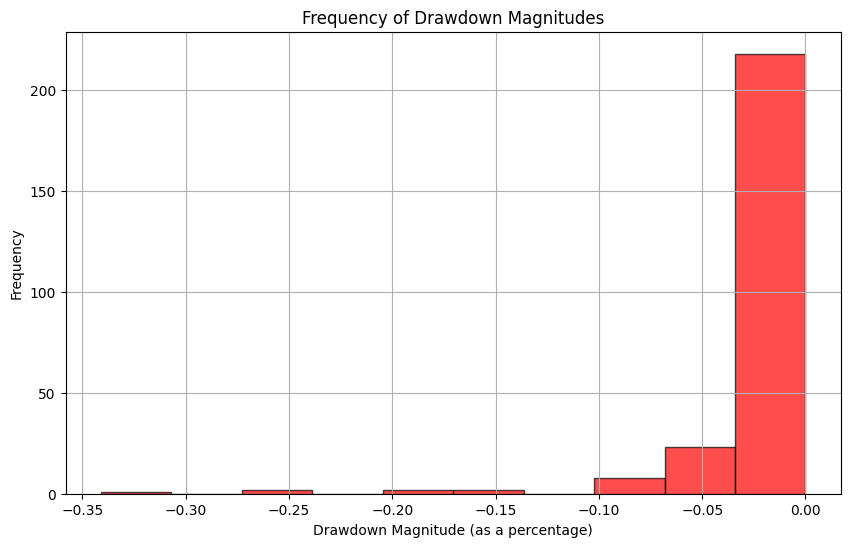

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(drawdown_metrics_df['Magnitude'], bins=10, color='red', alpha=0.7, edgecolor='black')
plt.title('Frequency of Drawdown Magnitudes')
plt.xlabel('Drawdown Magnitude (as a percentage)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# 3. Calculating VaR

In [30]:
import pandas as pd
import numpy as np

file1_path = 'Copy of jj4zybxbcqobf0an.xlsx'  
daily_data = pd.read_excel(file1_path)
daily_data['Daily Return per share'] = pd.to_numeric(daily_data['Daily Return per share'], errors='coerce')

confidence_level = 0.95 
VaR_95 = np.percentile(daily_data['Daily Return per share'].dropna(), (1 - confidence_level) * 100)
print(f"Value at Risk (VaR) at {confidence_level * 100}% confidence level: {VaR_95:.4f}")

# Compute VaR for multiple confidence levels 
confidence_levels = [0.90, 0.95, 0.99]
VaRs = {
    f"VaR {int(cl * 100)}%": np.percentile(daily_data['Daily Return per share'].dropna(), (1 - cl) * 100)
    for cl in confidence_levels
}

for level, value in VaRs.items():
    print(f"{level}: {value:.4f}")


Value at Risk (VaR) at 95.0% confidence level: -0.0173
VaR 90%: -0.0115
VaR 95%: -0.0173
VaR 99%: -0.0331


In [25]:
# Aggregate daily returns into monthly returns
daily_data['Date'] = pd.to_datetime(daily_data['Date'])
daily_data.set_index('Date', inplace=True)
monthly_returns = daily_data['Daily Return per share'].resample('M').apply(lambda x: (1 + x).prod() - 1)

confidence_level = 0.95
VaR_monthly = np.percentile(monthly_returns.dropna(), (1 - confidence_level) * 100)

print(f"Monthly VaR (95% Confidence): {VaR_monthly:.4f}")

Monthly VaR (95% Confidence): -0.0695


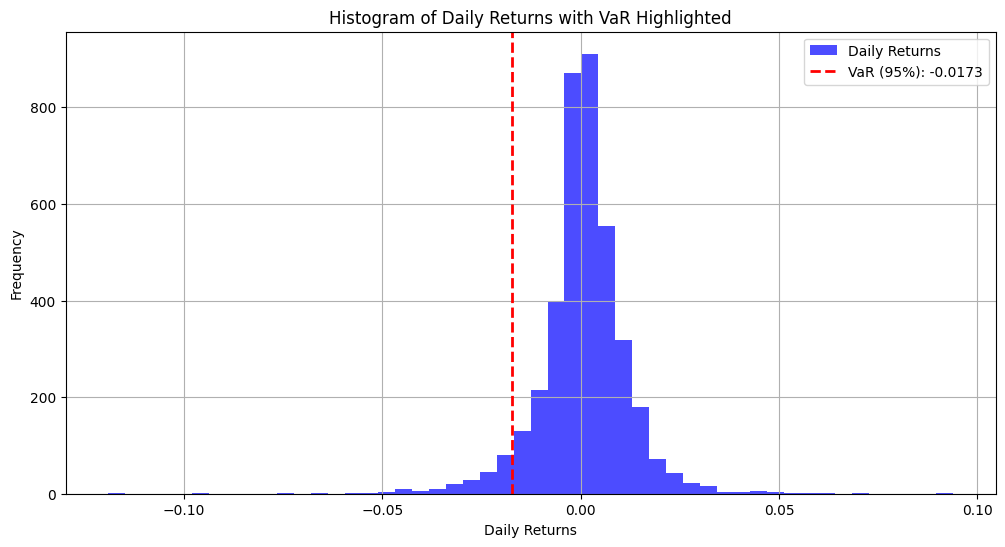

In [31]:
import matplotlib.pyplot as plt
import numpy as np

confidence_level = 0.95
VaR_95 = np.percentile(daily_data['Daily Return per share'].dropna(), (1 - confidence_level) * 100)

plt.figure(figsize=(12, 6))
plt.hist(daily_data['Daily Return per share'].dropna(), bins=50, color='blue', alpha=0.7, label='Daily Returns')
plt.axvline(VaR_95, color='red', linestyle='--', linewidth=2, label=f'VaR (95%): {VaR_95:.4f}')
plt.title('Histogram of Daily Returns with VaR Highlighted')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

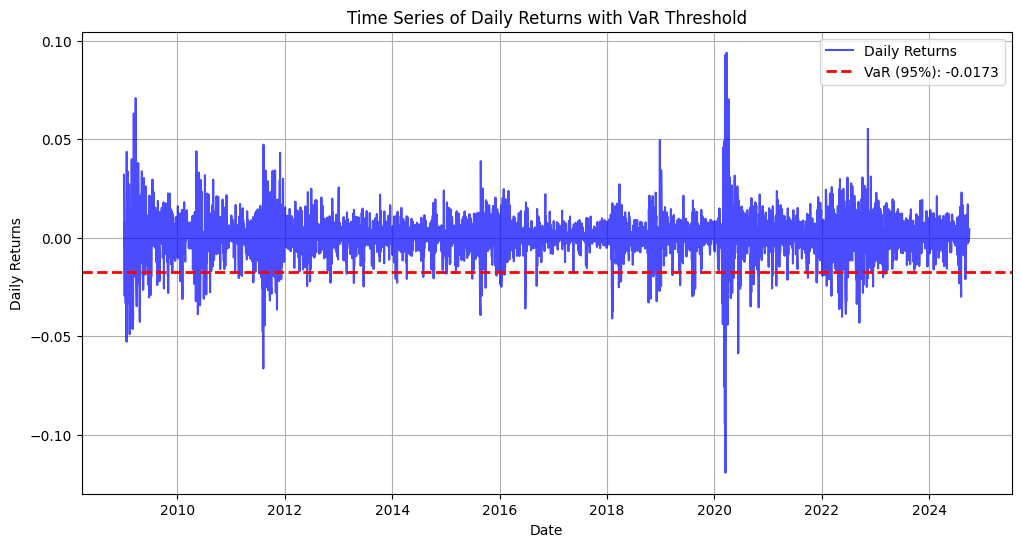

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Date'], daily_data['Daily Return per share'], label='Daily Returns', color='blue', alpha=0.7)
plt.axhline(VaR_95, color='red', linestyle='--', linewidth=2, label=f'VaR (95%): {VaR_95:.4f}')
plt.title('Time Series of Daily Returns with VaR Threshold')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.grid()
plt.show()

# 4. Combined Extraction of all Metrics

In [11]:
import pandas as pd
import numpy as np

def compute_risk_metrics(data, etf_name, confidence_level=0.95, drawdown_threshold=-0.01):

    metrics = {'ETF': etf_name}
    
    data['Daily Return per share'] = pd.to_numeric(data['Daily Return per share'], errors='coerce')
    data['Net Asset Value per Share'] = pd.to_numeric(data['Net Asset Value per Share'], errors='coerce')

    # Scale NAV if values are extremely large
    if data['Net Asset Value per Share'].max() > 1000:
        data['Net Asset Value per Share'] /= data['Net Asset Value per Share'].iloc[0]  

    # 1. Volatility
    metrics['Volatility'] = data['Daily Return per share'].std()

    # 2. Absolute Drawdowns
    data['Running Max NAV'] = data['Net Asset Value per Share'].cummax()
    data['Absolute Drawdown'] = data['Net Asset Value per Share'] - data['Running Max NAV']
    metrics['Max Absolute Drawdown'] = data['Absolute Drawdown'].min()  

    # 3. Relative Drawdowns
    data['Relative Drawdown'] = (data['Net Asset Value per Share'] / data['Running Max NAV']) - 1
    metrics['Max Relative Drawdown'] = data['Relative Drawdown'].min()  

    # 4. VaR
    metrics['VaR'] = np.percentile(data['Daily Return per share'].dropna(), (1 - confidence_level) * 100)

    # 5. Drawdown Frequency, Duration, Magnitude
    data['In Drawdown'] = data['Relative Drawdown'] < drawdown_threshold
    drawdown_periods = []
    drawdown_start_index = None

    for i, in_drawdown in enumerate(data['In Drawdown']):
        if in_drawdown:
            if drawdown_start_index is None:
                drawdown_start_index = i
        else:
            if drawdown_start_index is not None:
                drawdown_periods.append((drawdown_start_index, i - 1))
                drawdown_start_index = None

    if drawdown_start_index is not None:  
        drawdown_periods.append((drawdown_start_index, len(data) - 1))

    drawdown_metrics = []
    for start, end in drawdown_periods:
        duration = end - start + 1
        magnitude = data['Relative Drawdown'][start:end + 1].min()
        drawdown_metrics.append({'Start': start, 'End': end, 'Duration': duration, 'Magnitude': magnitude})

    drawdown_metrics_df = pd.DataFrame(drawdown_metrics)

    # Aggregate drawdown metrics
    if not drawdown_metrics_df.empty:
        metrics['Drawdown Frequency'] = len(drawdown_metrics_df)
        metrics['Average Drawdown Duration'] = drawdown_metrics_df['Duration'].mean()
        metrics['Max Drawdown Duration'] = drawdown_metrics_df['Duration'].max()
        metrics['Average Drawdown Magnitude'] = drawdown_metrics_df['Magnitude'].mean()
        metrics['Max Drawdown Magnitude'] = drawdown_metrics_df['Magnitude'].min()  # Most negative magnitude
    else:
        metrics['Drawdown Frequency'] = 0
        metrics['Average Drawdown Duration'] = 0
        metrics['Max Drawdown Duration'] = 0
        metrics['Average Drawdown Magnitude'] = 0
        metrics['Max Drawdown Magnitude'] = 0

    return metrics


file1_path = 'AllFunds.xlsx'  
data = pd.read_excel(file1_path)
data['Fund Identifier'] = data['Fund Identifier'].astype(str)

all_metrics = []
unique_funds = data['Fund Identifier'].unique()

for fund_id in unique_funds:
    fund_data = data[data['Fund Identifier'] == fund_id].copy()
    metrics = compute_risk_metrics(fund_data, etf_name=fund_id)
    all_metrics.append(metrics)

metrics_df = pd.DataFrame(all_metrics)
metrics_df

,ETF,Volatility,Max Absolute Drawdown,Max Relative Drawdown,VaR,Drawdown Frequency,Average Drawdown Duration,Max Drawdown Duration,Average Drawdown Magnitude,Max Drawdown Magnitude
0,16430,0.009434,-93.8042,-0.531438,-0.015400,38,93.605263,1148,-0.065490,-0.531438
1,16437,0.012679,-233.9811,-0.805720,-0.019020,131,21.908397,718,-0.041350,-0.805720
2,16467,0.014027,-91.9500,-0.651989,-0.020906,91,35.901099,1946,-0.044235,-0.651989
3,24697,0.013026,-143.9746,-0.356418,-0.020934,157,15.898089,488,-0.039445,-0.356418
4,27635,0.010879,-121.1711,-0.341001,-0.016423,161,14.677019,491,-0.032189,-0.341001
5,29218,0.009791,-84.0751,-0.455727,-0.015107,40,86.925000,2237,-0.047779,-0.455727
6,31250,0.002726,-21.3400,-0.238809,-0.004390,40,78.000000,1023,-0.025145,-0.238809
7,31464,0.010541,-44.6700,-0.367866,-0.015886,134,19.589552,415,-0.034859,-0.367866
8,31466,0.011154,-63.6500,-0.349715,-0.016923,155,15.787097,512,-0.033511,-0.349715
9,35856,0.011013,-19.0200,-0.397658,-0.016863,54,62.722222,801,-0.055115,-0.397658
